In [1]:
import re

In [2]:
with open('../data/sherlock_holmes.txt', 'r', encoding='utf-8') as file:
    text = file.read()
print("Length of text:", len(text))

Length of text: 562202


In [3]:
text = text.lower()

In [4]:
text = re.sub(r"[^a-z0-9'\s]", '', text)
text = re.sub(r'\s+', ' ', text).strip()
print(text[:500])

the adventures of sherlock holmes by arthur conan doyle contents i a scandal in bohemia ii the redheaded league iii a case of identity iv the boscombe valley mystery v the five orange pips vi the man with the twisted lip vii the adventure of the blue carbuncle viii the adventure of the speckled band ix the adventure of the engineers thumb x the adventure of the noble bachelor xi the adventure of the beryl coronet xii the adventure of the copper beeches i a scandal in bohemia i to sherlock holmes


In [5]:
tokens = text.split()
print("Number of tokens:", len(tokens))
print("First 20 tokens:", tokens[:20])

Number of tokens: 104465
First 20 tokens: ['the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'contents', 'i', 'a', 'scandal', 'in', 'bohemia', 'ii', 'the', 'redheaded', 'league', 'iii']


In [6]:
print(tokens[:50])

['the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'contents', 'i', 'a', 'scandal', 'in', 'bohemia', 'ii', 'the', 'redheaded', 'league', 'iii', 'a', 'case', 'of', 'identity', 'iv', 'the', 'boscombe', 'valley', 'mystery', 'v', 'the', 'five', 'orange', 'pips', 'vi', 'the', 'man', 'with', 'the', 'twisted', 'lip', 'vii', 'the', 'adventure', 'of', 'the', 'blue', 'carbuncle', 'viii', 'the']


In [7]:
import json

with open('../data/cleaned_sherlock_tokens.json', 'w', encoding='utf-8') as outfile:
    json.dump(tokens, outfile)

In [8]:
from collections import defaultdict, Counter

def generate_bigrams(tokens):
    bigrams = []
    for i in range(len(tokens) - 1):
        bigrams.append((tokens[i], tokens[i+1]))
    return bigrams

In [9]:
bigrams = generate_bigrams(tokens)
print("First 10 bigrams:", bigrams[:10])

First 10 bigrams: [('the', 'adventures'), ('adventures', 'of'), ('of', 'sherlock'), ('sherlock', 'holmes'), ('holmes', 'by'), ('by', 'arthur'), ('arthur', 'conan'), ('conan', 'doyle'), ('doyle', 'contents'), ('contents', 'i')]


In [10]:
def build_bigram_model(tokens):
    model = defaultdict(Counter)
    bigrams = generate_bigrams(tokens)
    for first, second in bigrams:
        model[first][second] += 1
    return model

# Building the bigram model using tokens
bigram_model = build_bigram_model(tokens)

In [11]:
def predict_next_word(model, word):
    if word in model:
        return model[word].most_common(1)[0][0]
    else:
        return None

# Testing the prediction function
test_word = 'sherlock'
predicted_word = predict_next_word(bigram_model, test_word)
print(f"Prediction for '{test_word}':", predicted_word)


Prediction for 'sherlock': holmes


In [12]:
# Function to generate a sentence using bigram
def generate_sentence(model, start_word, length=10):
    sentence = [start_word]
    current_word = start_word
    
    for i in range(length - 1):
        next_word = predict_next_word(model, current_word)
        if next_word is None:
            break
        sentence.append(next_word)
        current_word = next_word
    
    return ' '.join(sentence)

In [13]:
# Testing the sentence generation function.
generated_sentence = generate_sentence(bigram_model, 'sherlock', 10)
print("Generated sentence:", generated_sentence)

Generated sentence: sherlock holmes i have been a little more than i


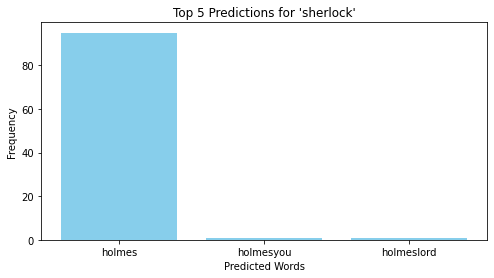

In [14]:
import matplotlib.pyplot as plt

def plot_prediction_distribution(model, word, top_n=5):
    if word in model:
        most_common = model[word].most_common(top_n)
        words, counts = zip(*most_common)
        
        # Creating a bar chart
        plt.figure(figsize=(8, 4))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top {top_n} Predictions for '{word}'")
        plt.xlabel("Predicted Words")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"No predictions for '{word}' found in the model.")

# Testing the visualization function with the word 'sherlock'
plot_prediction_distribution(bigram_model, 'sherlock')

In [22]:
# Interactive next-word prediction using the bigram model.

# Prompt the user to enter a word.
user_word = input("Enter a word to predict the next word: ").strip().lower()

# Use the predict_next_word function from earlier.
predicted = predict_next_word(bigram_model, user_word)

# Check if a prediction was made and print the result.
if predicted:
    print(f"Predicted next word for '{user_word}': {predicted}")
else:
    print(f"Sorry, no prediction available for the word '{user_word}'.")

Enter a word to predict the next word: dr
Predicted next word for 'dr': grimesby
